On s'intéresse au problème de la registration d'images par calcul de
l'information mutuelle normalisée entre celles-ci.

1) Rappeler le lien entre l'information mutuelle normalisée I(X,Y) de deux
variables aléatoires X et Y et l'entropie de celles-ci.

Réponse:
Il existe plusieurs normalisations possibles, on utilise la formule de l'incertitude simétrique vu en cours
i.e $ NMI(X, Y) = \frac{2*IM(X,Y)}{(H(A) + H(B)} $

In [3]:
# Mettre en ligne les fichiers utilisés
from google.colab import files
uploaded = files.upload()

Saving lena4.jpeg to lena4.jpeg
Saving lena.jpeg to lena.jpeg
Saving Jezero2.tif to Jezero2.tif
Saving Jezero1.tif to Jezero1.tif


2) Considérons l'image "lena.jpeg" comme une variable aléatoire, calculer et afficher la densité de probabilité associée.

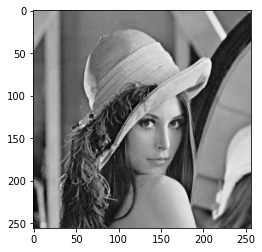

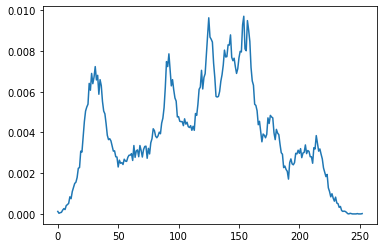

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#Ouverture de l'image
Im = Image.open('lena.jpeg')

#On transforme l'image en tableau
Imarray = np.asarray(Im)
#On cree une nouvelle figure
plt.figure()
#On affiche les données comme une image d'échelle des gris
plt.imshow(Imarray, cmap='gray')

# Calculer et afficher la densité de probabilité de l'image
#
# On cree un tableau tel que [0, .., 257]
# Le +2 est dû au fait que la fontion histogram prend des intervalles ouvert à
# gauche tel que  [0, 1[, [1, 2[, ..., [n-1, n[ et à que la fonction range
# s'arrete à n-1

xe = np.asarray(range(np.amax(Imarray[:])+2))

# reshape(-1) concatène les listes de listes retournant une liste unique
# H1 contient un tableau avec le nombre d'occurrences totales de chaque couleur
H1, xe = np.histogram(Imarray.reshape(-1), bins=xe)

# On divise le nombre d'occurences pour la taille de l'image pour avoir les
# probabilités
P1 = H1/Imarray.size
plt.figure()
plt.plot(P1)

def den_prob(im):
  # im: 2d np array
  xe = np.asarray(range(np.amax(im[:])+2))
  H, xe = np.histogram(im.reshape(-1), bins=xe) 
  P = H/im.size
  return P
P1_prob = den_prob(Imarray)

3) Calculer l'entropie correspondante:

In [6]:
# Calculer et afficher l'entropie de l'image
def entropie(prob):
  # prob np array ou list avec les probabilités
  res = 0
  for p in prob:
    if p != 0 :
      res += p * np.log2(p)
  res *= -1
  return res 

print(entropie(P1_prob))


7.653048611238887


4) Utiliser l'image seuillée lena4 et calculer la densité de probabilité jointe
entre lena et lena4 ainsi que l'entropie jointe.

10.348119484023458


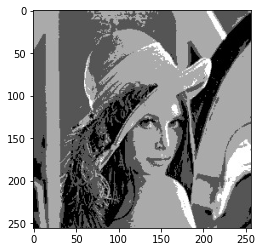

In [7]:
# Densité de probabilité jointe

def den_prob_jointe(im1, im2):
  # im1: image 1 (2D np array)
  # im2: image 2 (2D np array)
  im1_max = np.amax(im1[:])
  im2_max = np.amax(im2[:])
  H = np.histogram2d(im1.reshape(-1), im2.reshape(-1), 
                          bins=(im1_max, im2_max))[0]
  H = H.reshape(-1)
  P = H/im1.size
  return P

def entropie_jointe(prob_jointe): 
  # prob_jointe (np array) avec les la densité de probabilité
  # jointe
  return entropie(prob_jointe)

im_lena4 = Image.open('lena4.jpeg') 
lena4_array = np.asarray(im_lena4) 
plt.figure() 
plt.imshow(lena4_array, cmap='gray') 
# Densité de probabilité jointe
prob_jointe = den_prob_jointe(lena4_array, Imarray)
print(entropie_jointe(prob_jointe))



5) Ecrire une fonction `NMI(I1, I2)` qui renvoie l'information mutuelle
normalisée entre les images Im1 et Im2.

In [8]:
def nmi(im1, im2):
  # im1: image 1 (2D np array)
  # im2: image 2 (2D np array)
  
  # Densité de probabilité et entropie de chaque image
  ent_im1 = entropie(den_prob(im1))
  ent_im2 = entropie(den_prob(im2))
  # Densité de probabilité jointe et entropie jointe
  ent_jointe = entropie_jointe(den_prob_jointe(im1, im2))
  # Calcul de l'information mutuelle normalisée
  inf_mut = ent_im1-ent_jointe+ent_im2
  nmi = 2*inf_mut/(ent_im1 + ent_im2)
  return nmi


Calculer la NMI entre les deux images de lena.

In [9]:
# NMI entre les deux images
print(nmi(Imarray, lena4_array))

0.2948343212105153


6) On considère une paire stereo de deux images du cratère Jezero prises par le
satellite HiRISE. Extraire la partie centrale de chaque image en conservant
une marge (200 pixels par exemple). Afficher la valeur absolue de la différence
entre les deux images. Calculer l'information mutuelle entre les deux parties
centrales. De même en décalant une image d'un pixel horizontalement.

0.03264960130745684
0.032575526492893046


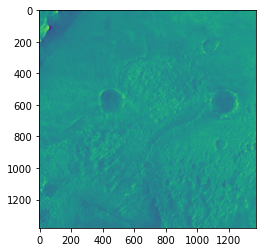

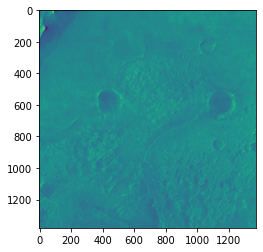

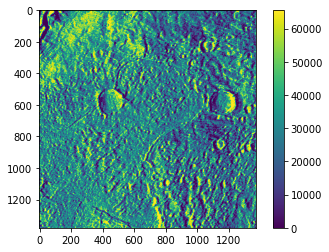

In [10]:
# Ouverture des images
im1 = Image.open('Jezero1.tif')
im2 = Image.open('Jezero2.tif')

#Transformation en np.array 
im1array = np.asarray(im1)
# plt.figure()
# plt.imshow(im1array)
im2array = np.asarray(im2)
# plt.figure()
# plt.imshow(im2array)


crop = 200

# Partie centrale de l'image 1 
im1cent = im1array[crop:-crop,crop:-crop]
plt.figure(1)
plt.imshow(im1cent)

# Partie centrale de l'image 2
im2orig = im2array[crop:-crop,crop:-crop]
plt.figure(2)
plt.imshow(im2orig)

# Différence entre les deux images 
imdiff = im1cent - im2orig
plt.figure(3)
plt.imshow(abs(imdiff))
plt.colorbar()

# Calcul de l'information mutuelle entre les deux parties centrales
print(nmi(im1cent, im2orig))

# Décaler la partie centrale de l'image 2 d'un pixel horizontalement
im2_1px = im2array[crop+1:-crop+1,crop:-crop]

# Calcul de l'information mutuelle entre Im1cent et la version décalée de Im2
print(nmi(im1cent, im2_1px))

7) On a vu en cours que l'information mutuelle normalisée est maximale lorsque
celles-ci sont recalées "au mieux".
Ecrire une fonction`registration(I1, I2, niter)` qui calcule itérativement la
translation optimale permettant de registrer les deux images.

In [11]:
def registration(im1cent, im2array, niter=100, crop=200, depv=0, deph=0):
  # Im1cent: partie centrale de l'image 1 (2D np array)
  # Im2array: image 2 (2D np array)
  # niter: nombre d'itérations (default: 100)
  # crop: marge pour le déplacement (default: 200)
  # depv: déplacement vertical initial (default: 0)
  # deph: déplacement horizontal initial (default: 0)
  vec_nmi = []
  # Itérer niter fois
  for i in range(niter):
      print(f'Iteration: {i}')
      print(f'Deplacement vertical: {depv}')
      print(f'Deplacement horizontal: {deph}')
      
      # Extraire la partie de l'image 2 centrée sur le déplacement actuel et 
      # calculer la nmi
      im_crop = im2array[crop+deph:-crop+deph,crop+depv:-crop+depv]
      curr_nmi = nmi(im1cent, im_crop)
      # Ajout du nmi de l'image courante pour une ultérieur utilisation
      vec_nmi.append(curr_nmi)

      # Extraire chaque partie de l'image 2 décalée d'un pixel dans chacune des
      # 4 directions
      im_one_px_h = im2array[crop+deph+1:-crop+deph+1,crop+depv:-crop+depv]
      im_minus_one_px_h = im2array[crop+deph-1:-crop+deph-1,crop+depv:-crop+depv]
      im_one_px_v = im2array[crop+deph:-crop+deph,crop+depv+1:-crop+depv+1]
      im_minus_one_px_v = im2array[crop+deph:-crop+deph,crop+depv-1:-crop+depv-1]

      # Calculer l'information mutuelle normalisée entre l'image 1 et chacune 
      # des images décalées  
      nmi_one_h = nmi(im1cent, im_one_px_h)
      nmi_minus_one_h = nmi(im1cent, im_minus_one_px_h)
      nmi_one_v = nmi(im1cent, im_one_px_v)
      nmi_minus_one_v = nmi(im1cent, im_minus_one_px_v)
      nmis = [nmi_one_h, nmi_minus_one_h, nmi_one_v, nmi_minus_one_v]
      # Décider de la direction dans laquelle déplacer l'image et incrémenter 
      # depv et deph d'un pixel en fonction
      index_nmi_max = nmis.index(max(nmis))
      if nmis[index_nmi_max] <= curr_nmi :
        # Aucun déplacement n'améliore le nmi courant donc on arrête pour
        # éviter de boucler bêtement
        break

      if index_nmi_max == 0:
        deph+=1
      elif index_nmi_max == 1:
        deph-=1
      elif index_nmi_max == 2:
        depv+=1
      elif index_nmi_max == 3:
        depv-=1
     
  return im_crop, vec_nmi, depv, deph

Iteration: 0
Deplacement vertical: 0
Deplacement horizontal: 0
Iteration: 1
Deplacement vertical: -1
Deplacement horizontal: 0
Iteration: 2
Deplacement vertical: -2
Deplacement horizontal: 0
Iteration: 3
Deplacement vertical: -3
Deplacement horizontal: 0
Iteration: 4
Deplacement vertical: -4
Deplacement horizontal: 0
Iteration: 5
Deplacement vertical: -5
Deplacement horizontal: 0
Iteration: 6
Deplacement vertical: -6
Deplacement horizontal: 0
Iteration: 7
Deplacement vertical: -7
Deplacement horizontal: 0
Iteration: 8
Deplacement vertical: -8
Deplacement horizontal: 0
Iteration: 9
Deplacement vertical: -9
Deplacement horizontal: 0
Iteration: 10
Deplacement vertical: -10
Deplacement horizontal: 0
Iteration: 11
Deplacement vertical: -11
Deplacement horizontal: 0
Iteration: 12
Deplacement vertical: -12
Deplacement horizontal: 0
Iteration: 13
Deplacement vertical: -12
Deplacement horizontal: 1
Iteration: 14
Deplacement vertical: -12
Deplacement horizontal: 2
Iteration: 15
Deplacement verti

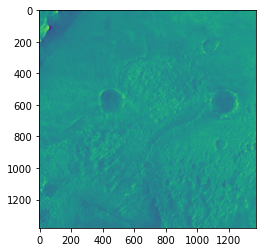

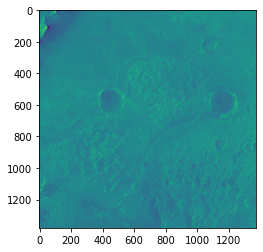

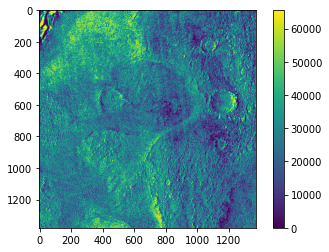

In [12]:
# Appeler registration pour calculer le décalage entre les deux images
im2cent, vec_nmi, depv, deph = registration(im1cent, im2array)

# Afficher les images originales, finales, ainsi que leur différences.
# Partie centrale de l'image 1
plt.figure(1)
plt.imshow(im1cent)

# Partie centrale de l'image 2
plt.figure(2)
plt.imshow(im2cent)

# Différence entre les deux images
imdiff = im1cent - im2cent
plt.figure(3)
plt.imshow(abs(imdiff))
plt.colorbar()

8) Afficher l'information mutuelle en fonction des itérations.
Expliquer l'allure de la courbe.

Réponse: Pendant les premières itérations le NMI progresse trés lentement 
car les images sont trés desalignés donc même aprés un mouvement de 1 pixel les 
images restent trés desalingés.
Lorsque on arrive aux dernières itérations les images sont presque aligné donc
il existe une grande augmentation entre itération chaque itération.

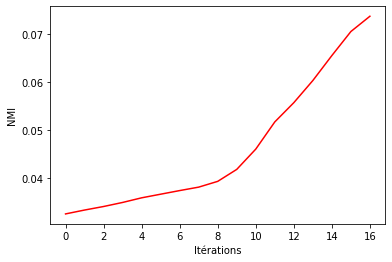

In [13]:
# Afficher l'évolution de la nmi
y = vec_nmi
x = [i for i in range(len(vec_nmi))]

plt.ylabel("NMI")
plt.xlabel("Itérations")
plt.plot(x, y, color="red")

plt.show()

9) Faites varier les valeurs de déplacement initiales `depv` et `deph` ainsi
que le nombre d'itérations. Concluer.


In [14]:
# Changer le déplacement initial
im2cent2, vec_nmi2, depv2, deph2 = registration(im1cent, im2array, niter=200, 
                                            depv= 10, deph=-8)


Iteration: 0
Deplacement vertical: 10
Deplacement horizontal: -8
Iteration: 1
Deplacement vertical: 9
Deplacement horizontal: -8
Iteration: 2
Deplacement vertical: 8
Deplacement horizontal: -8
Iteration: 3
Deplacement vertical: 7
Deplacement horizontal: -8
Iteration: 4
Deplacement vertical: 6
Deplacement horizontal: -8
Iteration: 5
Deplacement vertical: 5
Deplacement horizontal: -8
Iteration: 6
Deplacement vertical: 4
Deplacement horizontal: -8
Iteration: 7
Deplacement vertical: 3
Deplacement horizontal: -8
Iteration: 8
Deplacement vertical: 2
Deplacement horizontal: -8
Iteration: 9
Deplacement vertical: 1
Deplacement horizontal: -8
Iteration: 10
Deplacement vertical: 0
Deplacement horizontal: -8
Iteration: 11
Deplacement vertical: -1
Deplacement horizontal: -8
Iteration: 12
Deplacement vertical: -2
Deplacement horizontal: -8
Iteration: 13
Deplacement vertical: -3
Deplacement horizontal: -8
Iteration: 14
Deplacement vertical: -4
Deplacement horizontal: -8
Iteration: 15
Deplacement vert

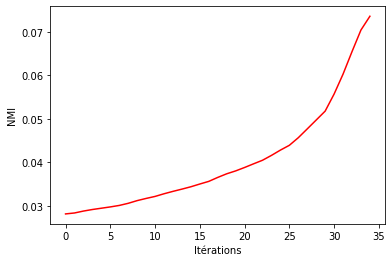

In [15]:
y = vec_nmi2
x = [i for i in range(len(vec_nmi2))]

plt.ylabel("NMI")
plt.xlabel("Itérations")
plt.plot(x, y, color="red")

plt.show()

10) Optionnel: Dans quel(s) cas l'algorithme pourrait ne pas réussir à
déterminer le déplacement correct ? Quelles solutions seraient possibles pour
y remédier ?

Réponse:
Dans le cas où il existe un maximum local notre algorithme ne trouvera aucun 
déplacement améliorant le NMI possible donc il s'arretra à un mauvaise 
emplacement. Une solution pour y rémedier serait de executer plusieurs fois le
code de `registration` avec différents déplacements initiaux et vérifier que le
déplacements finaux coincide.

11) Optionnel: Recoder registration en prenant en compte des déplacements non
entiers en utilisant de l'interpolation.

In [25]:
# Registration sub pixel
# Pour cela on utilise l'interpolation pour créer une nouvelle image
# et on pase cette nouvelle image à l'algorithme de resgistration
def interpolation(im2array, crop=200, depv=0, deph=0):
  # im (2D np array)
  # renvoie une nouvelle im avec 1px de plus en chaque bord calculé par
  # interpolation telle que:
   
  #         0ZZZZ0
  # XXXX    ZXXXXZ
  # XXXX -> ZXXXXZ
  # XXXX    ZXXXXZ
  #         0ZZZZ0

  h_sup_line = [0]
  h_inf_line = [0]
  h_len = len(im2array) - abs(-crop+deph) - abs(crop+deph)
  v_len = len(im2array[0]) - abs(-crop+depv) - abs(crop+depv)
  i = 0
  while i < v_len:
    res = im2array[crop+deph-1][crop+depv+i] + im2array[crop+deph][crop+depv+i]
    h_sup_line.append(res//2)
    res = im2array[-crop+deph-1][crop+depv+i] + im2array[-crop+deph][crop+depv+i]
    h_inf_line.append(res//2)
    i+=1
  h_sup_line.append(0)
  h_inf_line.append(0)

  v_right_line = []
  v_left_line = []
  i = 0
  while i < h_len:
    res = im2array[crop+deph+i][crop+depv-1] + im2array[crop+deph+i][crop+depv]
    v_left_line.append(res//2)
    res = im2array[crop+deph+i][-crop+depv-1] + im2array[crop+deph+i][-crop+depv]
    v_right_line.append(res//2)
    i+=1
  # v_right_line.append(0)
  # v_left_line.append(0)

  new_im  = im2array[crop+deph:-crop+deph,crop+depv:-crop+depv]
  new_im = np.insert(new_im, 0, v_left_line ,axis=1)
  new_im=  np.insert(new_im, len(new_im[0]), v_right_line ,axis=1)
  new_im = np.insert(new_im, 0, h_sup_line, axis=0)
  new_im = np.insert(new_im, len(new_im), h_inf_line, axis=0)
  return new_im

# Test d'interpolation
# a = np.array([[1, 2, 3, 9],
#               [6, 7, 8, 9],
#               [12,13,14,9],
#               [18,19,20,9],
#               [24,25,26,9]])
# print(interpolation(a, crop=1))

def registration2(im1cent, im2array, niter=100, crop=200, depv=0, deph=0):
  # Im1cent: partie centrale de l'image 1 (2D np array)
  # Im2array: image 2 (2D np array)
  # niter: nombre d'itérations (default: 100)
  # crop: marge pour le déplacement (default: 200)
  # depv: déplacement vertical initial (default: 0)
  # deph: déplacement horizontal initial (default: 0)
  vec_nmi = []
  # Itérer niter fois
  curr_im = im2array[crop+deph: -crop+deph, crop+depv:-crop+depv]
  for i in range(niter):
      print(f'Iteration: {i}')
      print(f'Deplacement vertical: {depv}')
      print(f'Deplacement horizontal: {deph}')
      
      # Extraire la partie de l'image 2 centrée sur le déplacement actuel et 
      # calculer la nmi
      curr_nmi = nmi(im1cent, curr_im)
      # Ajout du nmi de l'image courante pour une ultérieur utilisation
      vec_nmi.append(curr_nmi)

      # Extraire chaque partie de l'image 2 décalée d'un pixel dans chacune des
      # 4 directions avec interpolation
      im_inter = interpolation(im2array, crop, int(depv), int(deph))

      im_one_px_h = im_inter[2:, 1:-1]
      im_minus_one_px_h = im_inter[0:-2, 1:-1]
      im_one_px_v = im_inter[1:-1, 2:]
      im_minus_one_px_v = im_inter[1:-1, 0:-2]

      # Calculer l'information mutuelle normalisée entre l'image 1 et chacune 
      # des images décalées  
      nmi_one_h = nmi(im1cent, im_one_px_h)
      nmi_minus_one_h = nmi(im1cent, im_minus_one_px_h)
      nmi_one_v = nmi(im1cent, im_one_px_v)
      nmi_minus_one_v = nmi(im1cent, im_minus_one_px_v)
      nmis = [nmi_one_h, nmi_minus_one_h, nmi_one_v, nmi_minus_one_v]
      # Décider de la direction dans laquelle déplacer l'image et incrémenter 
      # depv et deph d'un pixel en fonction
      index_nmi_max = nmis.index(max(nmis))
      if nmis[index_nmi_max] < curr_nmi :
        # Aucun déplacement n'améliore le nmi courant donc on arrête pour
        # éviter de boucler bêtement
        break

      if index_nmi_max == 0:
        curr_im =im_one_px_h
        deph+=0.5
      elif index_nmi_max == 1:
        curr_im =im_minus_one_px_h
        deph-=0.5
      elif index_nmi_max == 2:
        curr_im =im_one_px_v
        depv+=0.5
      elif index_nmi_max == 3:
        curr_im =im_minus_one_px_v
        depv-=0.5
     
  return curr_im, vec_nmi, depv, deph
  return

# plt.figure(1)
# plt.imshow(im1array)

# inter = interpolation(im1array)
# plt.figure(2)
# plt.imshow(inter)
# im3cent3, vec_nmi2, depv2, deph2 = registration(inter, im2array, niter=200, 
#                                             depv= 10, deph=-8)
im2cent, vec_nmi, depv, deph = registration2(im1cent, im2array)

Iteration: 0
Deplacement vertical: 0
Deplacement horizontal: 0
Iteration: 1
Deplacement vertical: -0.5
Deplacement horizontal: 0
Iteration: 2
Deplacement vertical: -1.0
Deplacement horizontal: 0
Iteration: 3
Deplacement vertical: -1.5
Deplacement horizontal: 0
Iteration: 4
Deplacement vertical: -2.0
Deplacement horizontal: 0
Iteration: 5
Deplacement vertical: -2.5
Deplacement horizontal: 0
Iteration: 6
Deplacement vertical: -3.0
Deplacement horizontal: 0
Iteration: 7
Deplacement vertical: -3.5
Deplacement horizontal: 0
Iteration: 8
Deplacement vertical: -4.0
Deplacement horizontal: 0
Iteration: 9
Deplacement vertical: -4.5
Deplacement horizontal: 0
Iteration: 10
Deplacement vertical: -5.0
Deplacement horizontal: 0
Iteration: 11
Deplacement vertical: -5.5
Deplacement horizontal: 0
Iteration: 12
Deplacement vertical: -6.0
Deplacement horizontal: 0
Iteration: 13
Deplacement vertical: -6.5
Deplacement horizontal: 0
Iteration: 14
Deplacement vertical: -7.0
Deplacement horizontal: 0
Iteratio